In [1]:
#Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

In [2]:
#reading the data from the csv file

House_data = pd.read_csv("Downloads/train.csv")

In [3]:
House_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#dimensions of the house data set

House_data.shape

(1460, 81)

In [5]:
#column details

House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#description of the house data set

House_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Checking for percentage nulls in the house data set

round(100*(House_data.isnull().sum()/len(House_data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

We can obsereve that there are a few columns with high nulls

There are a few categorical and numerical variables have null values in the columns. So we need impute the the null vaues

In [8]:
#It is clear that there are multiple columns with high nulls, lets group them together

House_data.columns[House_data.isnull().any()] 

null = House_data.isnull().sum()/len(House_data)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [9]:
#Imputing the categorical variables with "None"

null_Categorical_vartiables = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_Categorical_vartiables:
    House_data[i].fillna("none", inplace=True)

In [10]:
#checking for the null vales after imputing

House_data.columns[House_data.isnull().any()] 

null_2 = House_data.isnull().sum()/len(House_data)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [11]:
#Checking these numerical variables individually to impute null vlaues

House_data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
House_data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [13]:
House_data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [14]:
House_data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [15]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

House_data['LotFrontage'] = House_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
House_data["GarageYrBlt"].fillna(House_data["GarageYrBlt"].median(), inplace=True)
House_data["MasVnrArea"].fillna(House_data["MasVnrArea"].median(), inplace=True)
House_data["Electrical"].dropna(inplace=True)

In [16]:
#Checking the numerical variables with imputed values
House_data['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [17]:
House_data['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [18]:
House_data['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [19]:
House_data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [20]:
#Checking for outlier in the numerical columns

House_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [21]:
#Method to remove outliers

def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [22]:
House_data.shape

(1460, 81)

### Now performing EDA on cleaned data

In [23]:
#All numeric (float and int) variables in the dataset

House_data_numeric = House_data.select_dtypes(include=['float64', 'int64'])
House_data_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
# Dropping the ID Column because it doesn't add any value

House_data_numeric = House_data_numeric.drop(['Id'], axis=1)

In [25]:
House_data_numeric.shape

(1460, 37)

### Now plotting the graphs with target variable and other variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

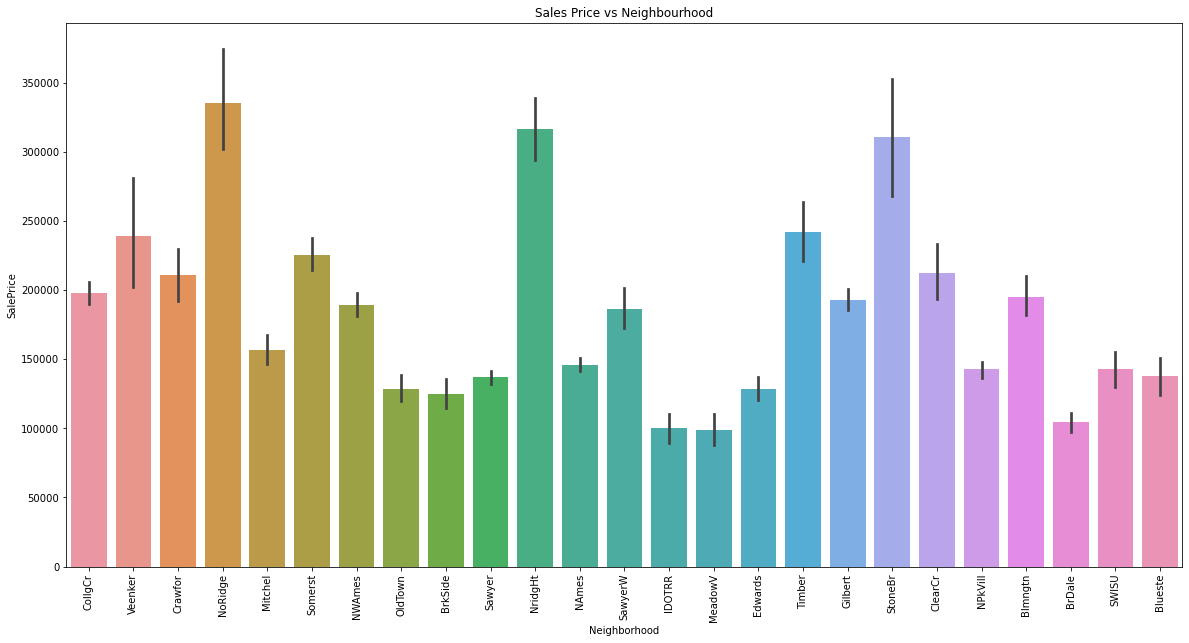

In [26]:
# Ploting sale Price vs Neighborhood

plt.figure(figsize=(20, 10))
sns.barplot(x="Neighborhood", y="SalePrice", data= House_data)
plt.title("Sales Price vs Neighbourhood")
plt.xticks(rotation=90)

We can conclude that a few properties of the neihborhood are high priced

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

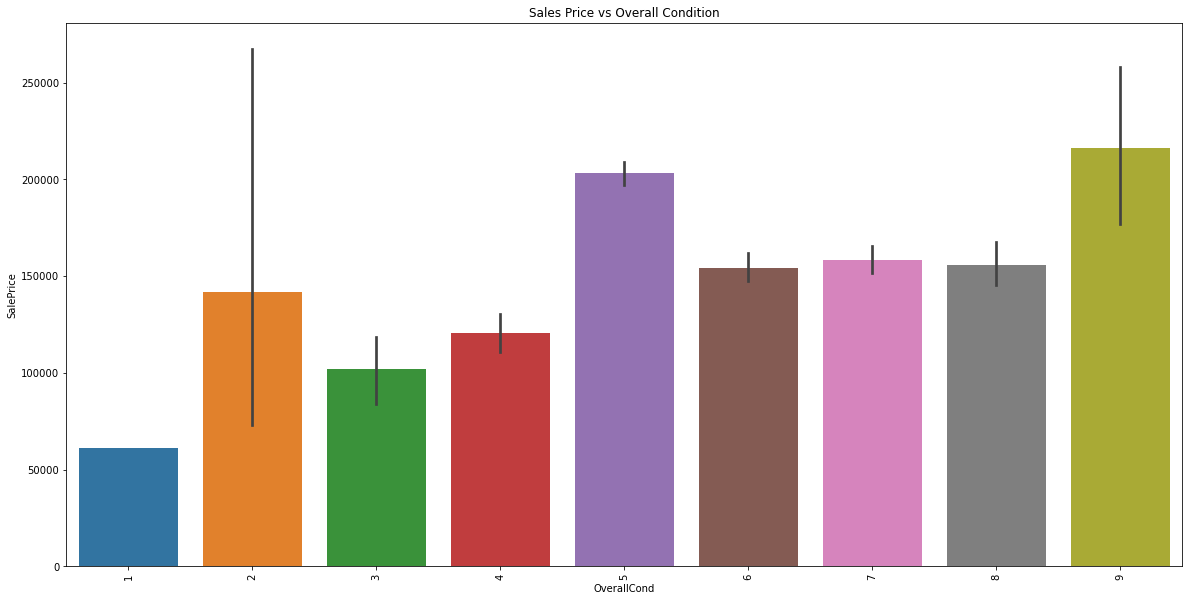

In [27]:
# plot Saleprice vs OverallCond

plt.figure(figsize=(20, 10))
sns.barplot(x="OverallCond", y="SalePrice", data= House_data)
plt.title("Sales Price vs Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

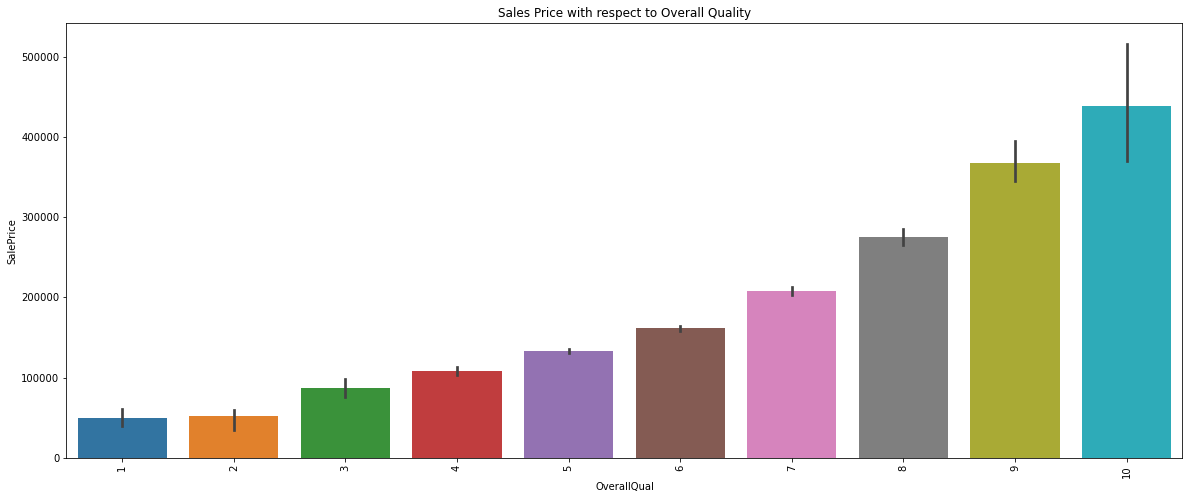

In [28]:
# plot saleprice vs OverallQual

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= House_data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

We can concluse that increase in the overall quality has a positive effect on the sale price

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

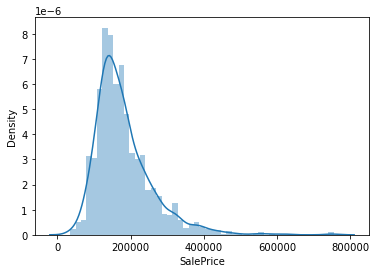

In [29]:
sns.distplot(House_data['SalePrice'])

We can observe that the Saleprice is left skewed

Applying the log transformation to obtain a centralized data

In [30]:
#Applying Log Transformation to saleprice variable

House_data['SalePrice']=np.log1p(House_data['SalePrice'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

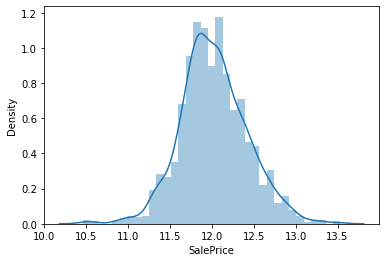

In [31]:
sns.distplot(House_data['SalePrice'])

### Checking for the correlation of numerical variables

In [32]:
# correlation matrix

correlation = House_data_numeric.corr()
correlation

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,...,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.052237,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


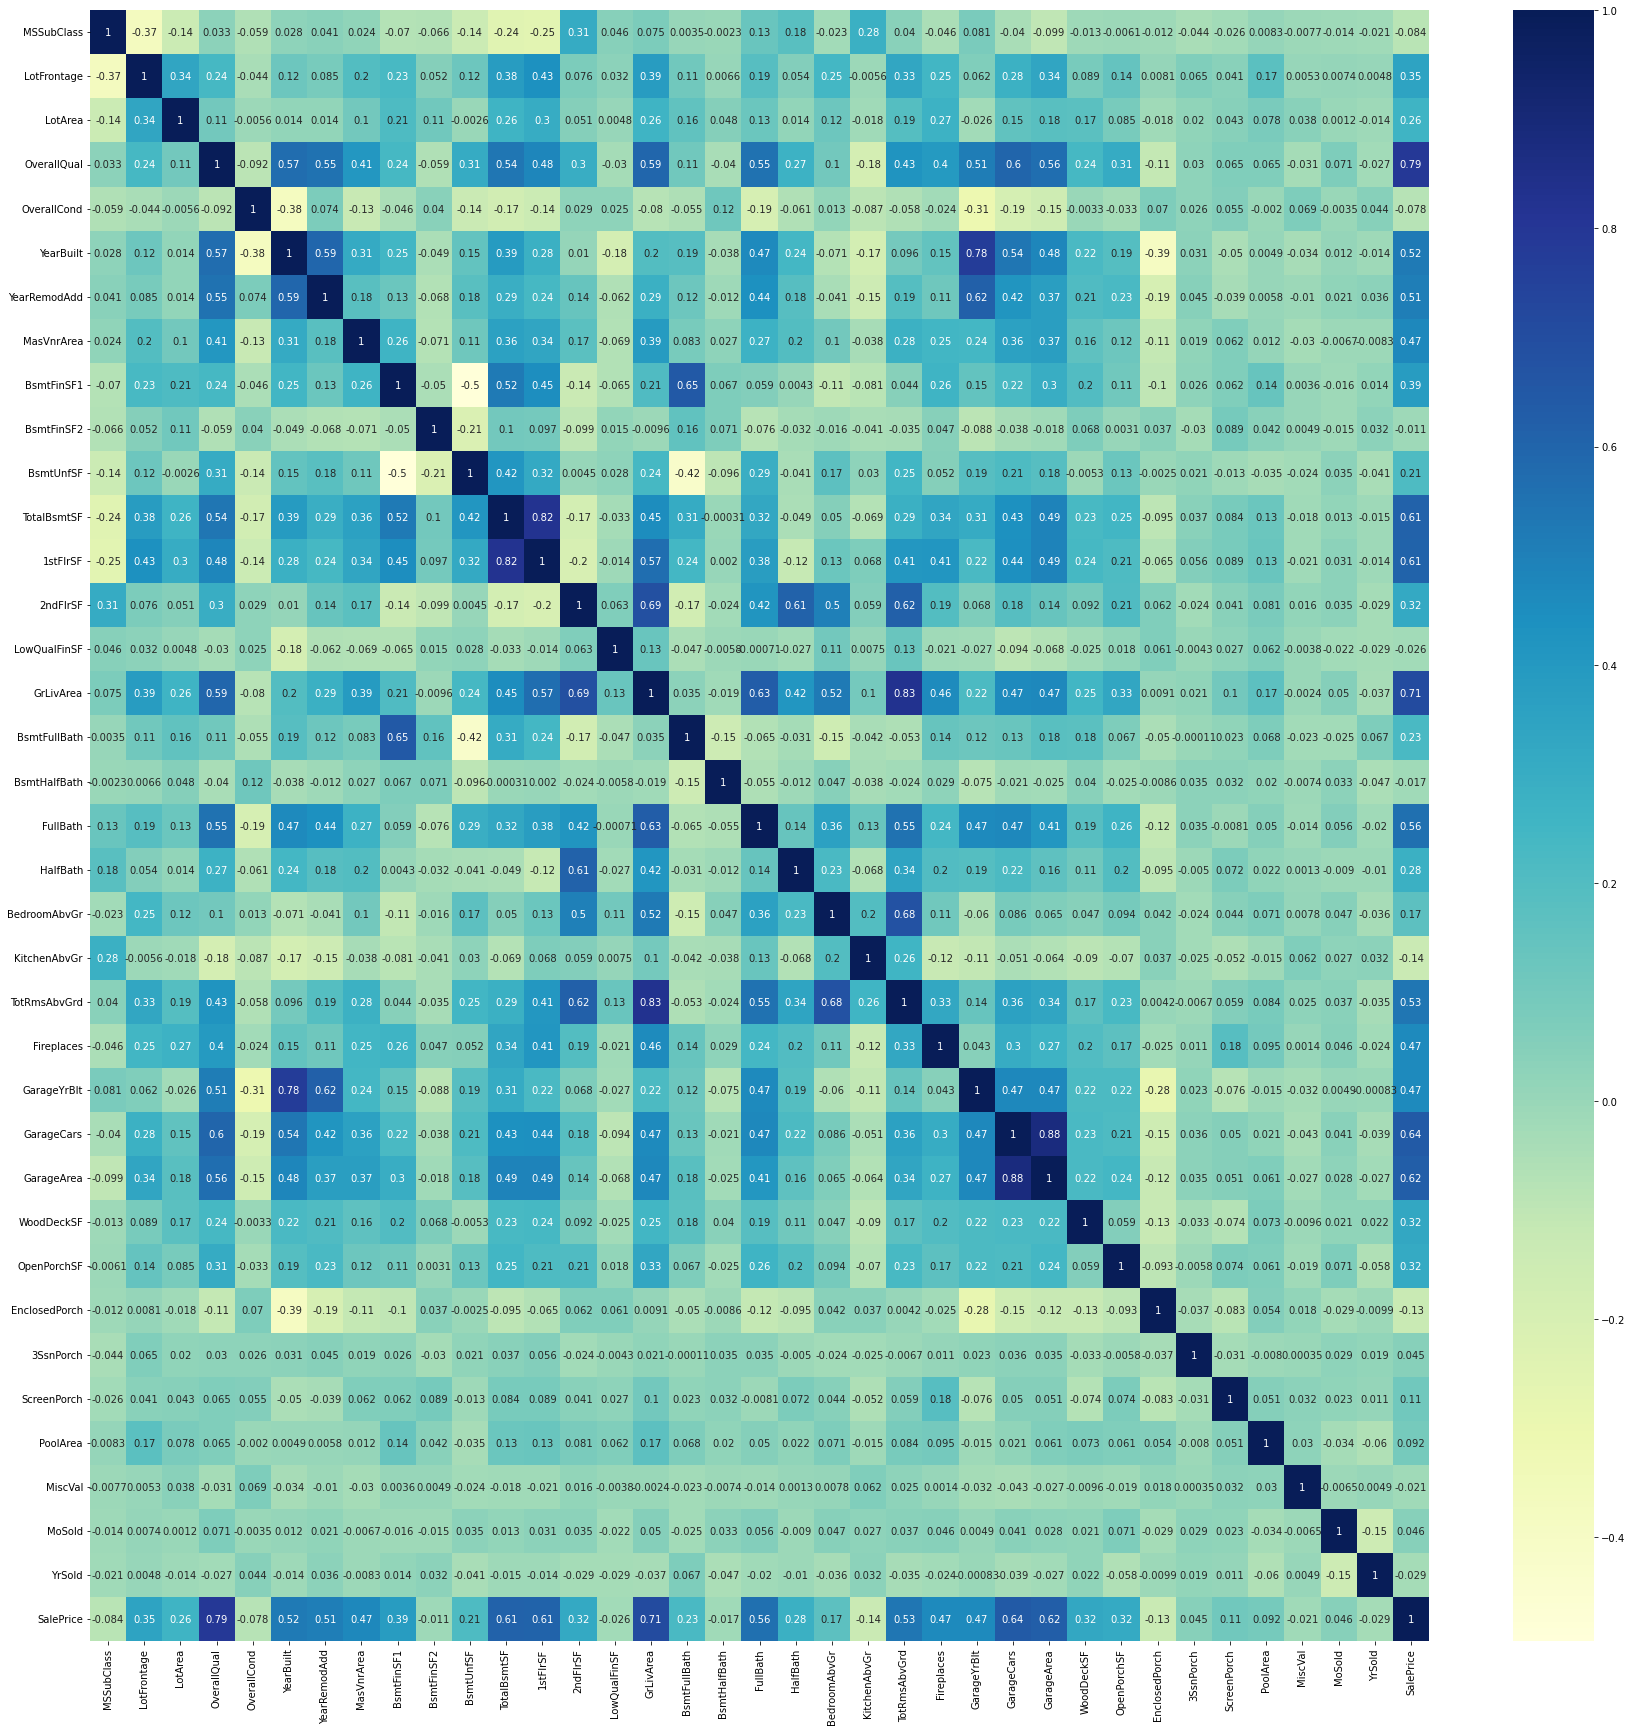

In [33]:
# plotting correlations of numerical variables on a heatmap

# figure size
plt.figure(figsize=(30,30))

# heatmap
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

We can observe that some of the numerical variables are correlated

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


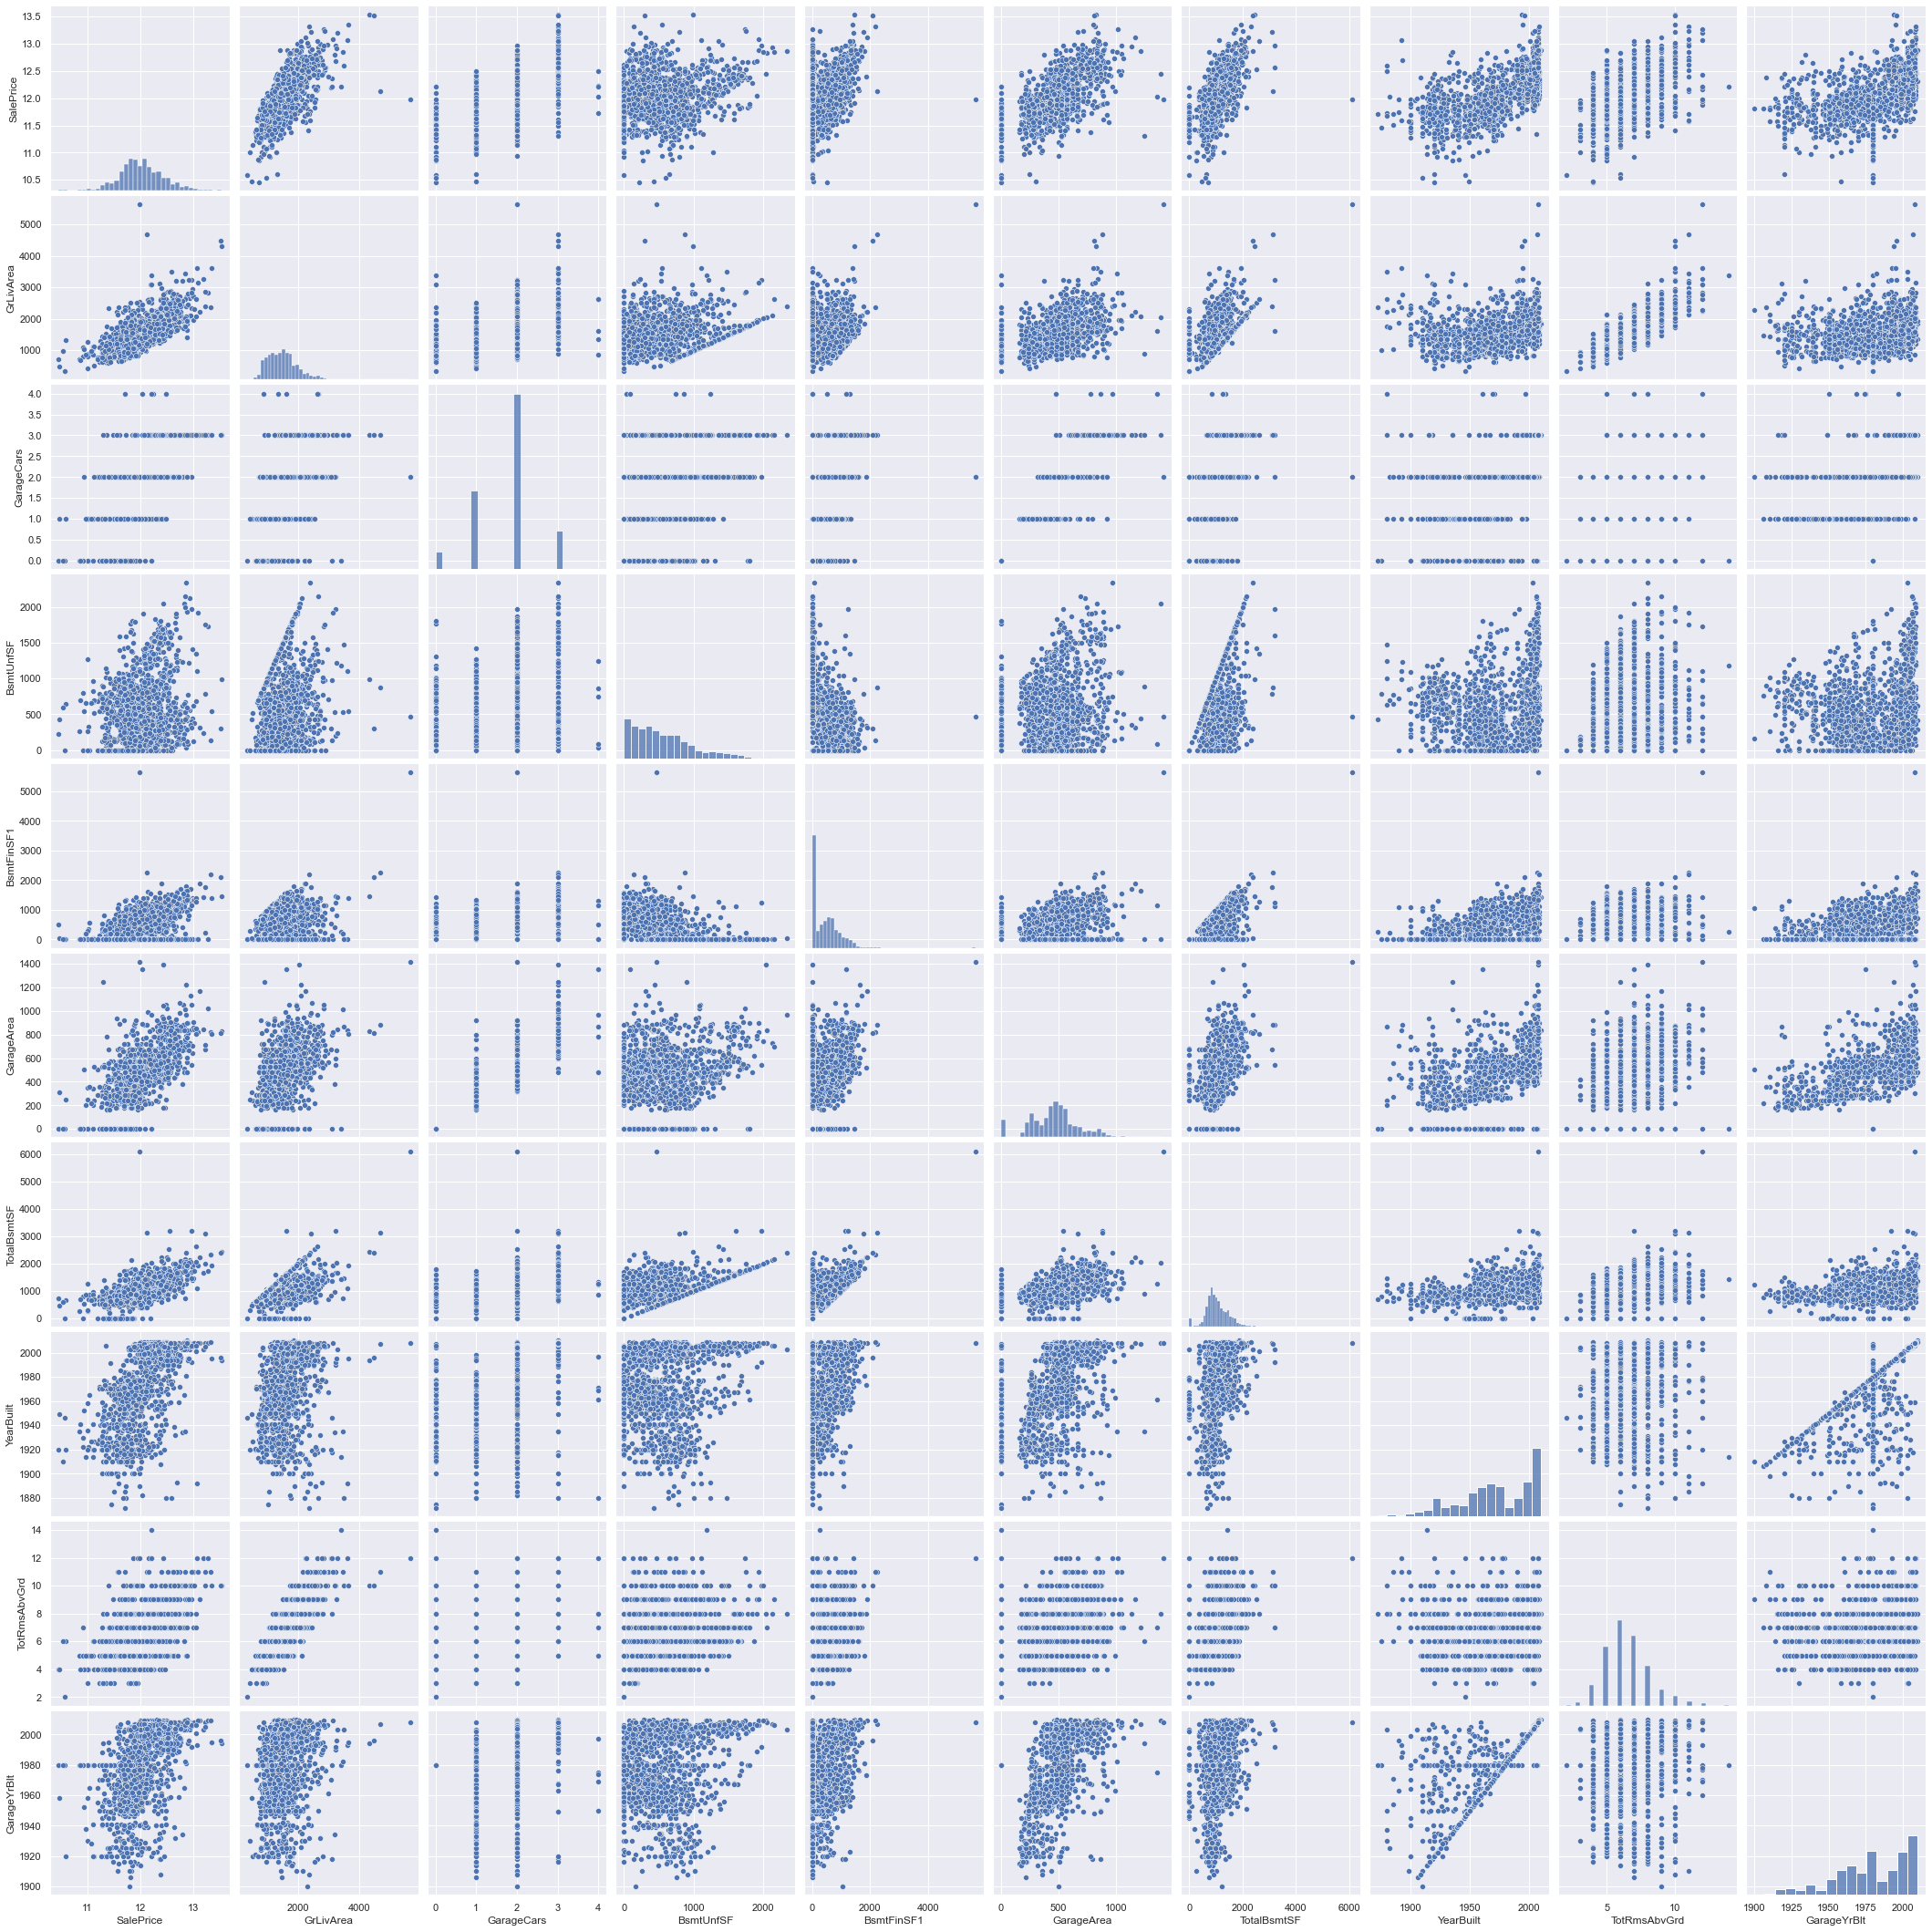

In [34]:
# let's checking the same with a pairplot to see the disctribution to find the variables which are correlated and not contributing to saleprice

sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(House_data[cols], size = 3)
plt.show()

We can see that a few columns that are correlated but not contributing to 'SalePrice'

In [35]:
#Drop the columns that are correlated and not contributing to saleprice

House_data = House_data.drop(['GarageCars'], axis = 1)
House_data = House_data.drop(['BsmtUnfSF'], axis = 1)
House_data = House_data.drop(['TotRmsAbvGrd'], axis = 1)
House_data = House_data.drop(['GarageYrBlt'], axis = 1)    

House_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,none,none,none,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,none,none,none,0,12,2008,WD,Normal,12.429220


In [36]:
#Numeric columns

House_data.select_dtypes(exclude=['object'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,12.072547
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,12.254868
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,12.493133
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,11.864469


### Analysing a few numerical variables with Saleprice

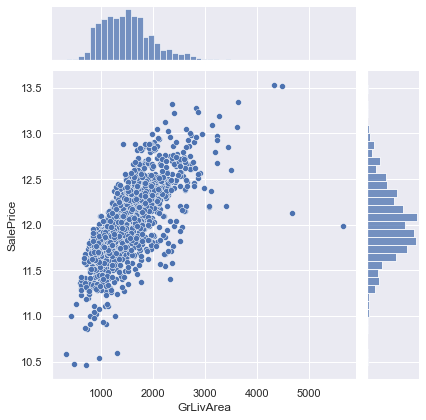

In [37]:
# Saleprice and GrLivArea

sns.jointplot(x='GrLivArea', y='SalePrice', data=House_data)
plt.show()

In [38]:
# Removing some outliers on lower right side of 'GrLivArea'

House_data = remove_outliers(House_data,'GrLivArea')

In [39]:
House_data.shape

(1429, 77)

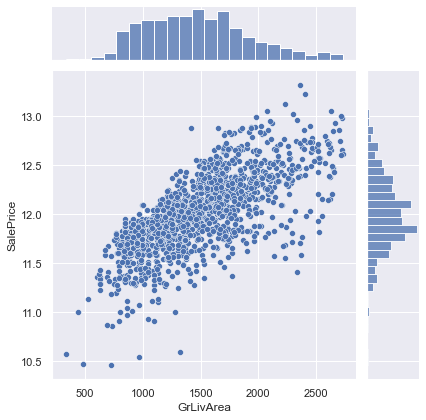

In [40]:
# plotting GeLivArea vs SalePrice after removing outliers

sns.jointplot(x = House_data['GrLivArea'], y = House_data['SalePrice'])
plt.show()

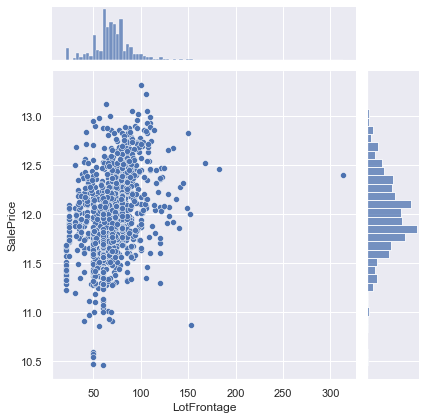

In [41]:
# SalePrice vs Lotfrontage 

sns.jointplot(x = 'LotFrontage', y = 'SalePrice', data = House_data)
plt.show()

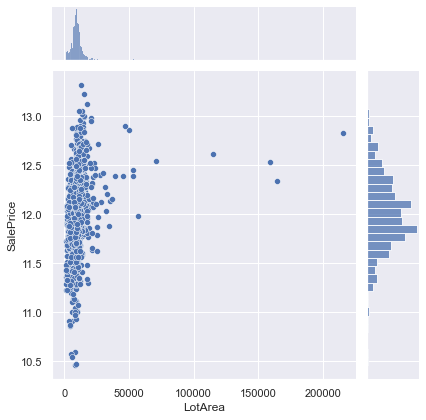

In [42]:
# SalePrice vs LotArea

sns.jointplot(x = 'LotArea', y = 'SalePrice', data = House_data)
plt.show()

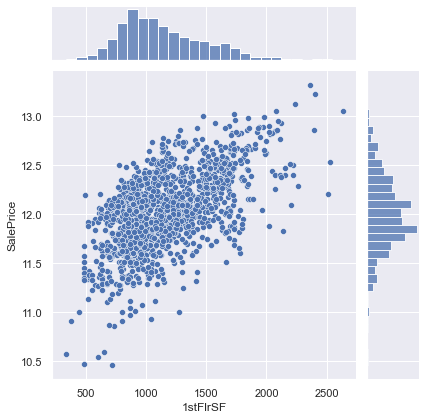

In [43]:
# SalePrice vs 1stFlrSF

sns.jointplot(x = '1stFlrSF', y = 'SalePrice', data = House_data)
plt.show()

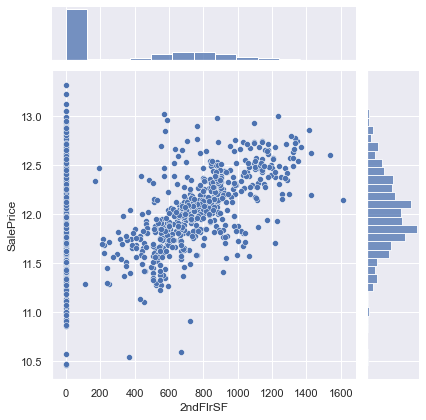

In [44]:
# SalePrice vs 2ndFlrSF

sns.jointplot(x = '2ndFlrSF', y = 'SalePrice', data = House_data)
plt.show()

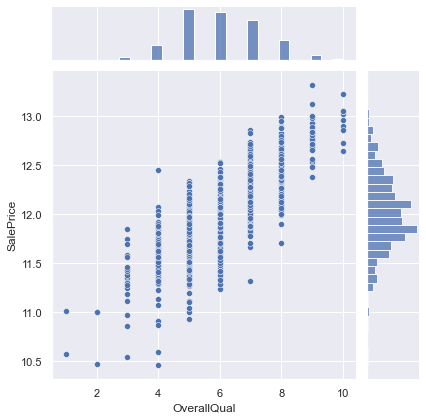

In [45]:
# SalePrice vs OverallQual

sns.jointplot(x = 'OverallQual', y = 'SalePrice', data = House_data)
plt.show()

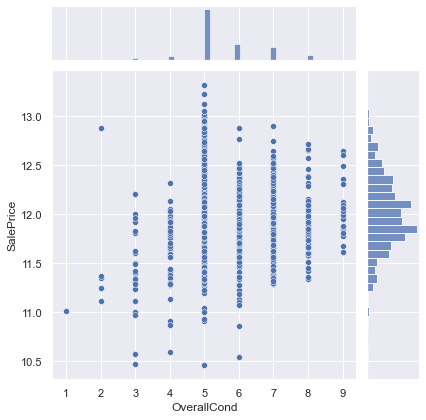

In [46]:
# SalePrice vs OverallCond

sns.jointplot(x = 'OverallCond', y = 'SalePrice', data = House_data)
plt.show()

#### Deriving a new column from the YrSold and YearBuilt columns and named as AgeOfProp

In [47]:
# Deriving a new Property AgeOfProp from yearsold - yearbuilt

House_data['AgeOfProp'] = (House_data['YrSold'] - House_data['YearBuilt'])
House_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeOfProp
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,2,2008,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,none,none,none,0,5,2007,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,9,2008,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,2,2006,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,none,none,none,0,12,2008,WD,Normal,12.429220,8


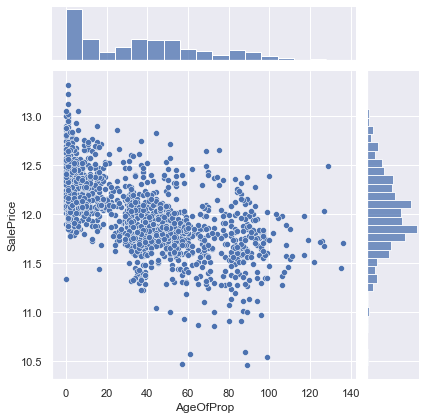

In [48]:
# SalePrice vs AgeOfProp

sns.jointplot(x = 'AgeOfProp', y = 'SalePrice', data = House_data)
plt.show()

We can conclude from the above plot that increase in the age of property is showing a decreasing saleprice trend i.e newer the property, high is the value

In [49]:
#As I created a derived column AgeOfProp from yearssold and yearbuilt I am dropping a few columns

House_data = House_data.drop(['MoSold'], axis = 1)
House_data = House_data.drop(['YrSold'], axis = 1)
House_data = House_data.drop(['YearBuilt'], axis = 1)
House_data = House_data.drop(['YearRemodAdd'], axis = 1)
House_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,AgeOfProp
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.247699,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.109016,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.317171,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Abnorml,11.849405,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,WD,Normal,12.429220,8


In [50]:
House_data.Street.value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [51]:
House_data.Utilities.value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

In [52]:
# dropping columns that show very low variance and thus not required for predictions

House_data = House_data.drop(['Street'], axis = 1)
House_data = House_data.drop(['Utilities'], axis = 1)

In [53]:
#checking the variance of numerical variables
l1 = House_data.select_dtypes(include=['float64', 'int64'])
l1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeOfProp
0,1,60,65.0,8450,7,5,196.0,706,0,856,...,548,0,61,0,0,0,0,0,12.247699,5
1,2,20,80.0,9600,6,8,0.0,978,0,1262,...,460,298,0,0,0,0,0,0,12.109016,31
2,3,60,68.0,11250,7,5,162.0,486,0,920,...,608,0,42,0,0,0,0,0,12.317171,7
3,4,70,60.0,9550,7,5,0.0,216,0,756,...,642,0,35,272,0,0,0,0,11.849405,91
4,5,60,84.0,14260,8,5,350.0,655,0,1145,...,836,192,84,0,0,0,0,0,12.429220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,0.0,0,0,953,...,460,0,40,0,0,0,0,0,12.072547,8
1456,1457,20,85.0,13175,6,6,119.0,790,163,1542,...,500,349,0,0,0,0,0,0,12.254868,32
1457,1458,70,66.0,9042,7,9,0.0,275,0,1152,...,252,0,60,0,0,0,0,2500,12.493133,69
1458,1459,20,68.0,9717,5,6,0.0,49,1029,1078,...,240,366,0,112,0,0,0,0,11.864469,60


In [54]:
for i in l1:
    print(House_data[i].value_counts())

1       1
956     1
977     1
976     1
975     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: Id, Length: 1429, dtype: int64
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
33.0       1
150.0      1
38.0       1
111.0      1
46.0       1
Name: LotFrontage, Length: 112, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: LotArea, Length: 1047, dtype: int64
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: OverallCond, dtype: int64
0.0      856
72.0       8
108.0      8
180.0      

A few Columns are having high null values, some of which were imputed. After imputing, it is found that there is a very little variance in the data.So decided to drop these columns.

In [55]:
House_data = House_data.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [56]:
House_data.shape

(1429, 63)

### Data Preparation

In [57]:
# Drop 'Id' from Dataframe

House_data = House_data.drop(['Id'], axis=1)
House_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,AgeOfProp
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,none,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,none,WD,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,none,WD,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,none,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,none,WD,Normal,12.429220,8


In [58]:
#type of each feature in data: int, float, object
types = House_data.dtypes

#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 

#categorical values are type object
categorical_type = types[types == object]

In [59]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [60]:
#converting numeric_type to a list to make it easier to work with

numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'AgeOfProp']


In [61]:
#Categorical columns

categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


#### Creating Dummy columns to convert categorical into numerical

In [62]:
House_data = pd.get_dummies(House_data, drop_first=True )
House_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [63]:
X = House_data.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [64]:
y = House_data['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [65]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [66]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AgeOfProp']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AgeOfProp']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AgeOfProp']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AgeOfProp']])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [67]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
11,0.085645,0.746261,0.154684,2.241710,-0.513939,1.145212,1.323938,-0.300737,0.345478,0.113320,...,0,0,1,0,0,0,0,0,0,1
1070,-0.869945,0.130905,-0.020017,-0.764271,-0.513939,0.152993,0.360916,-0.300737,0.030191,-0.267693,...,0,0,0,0,1,0,0,0,1,0
513,-0.869945,0.083570,-0.115156,-0.012775,-0.513939,-0.564274,-0.223442,-0.300737,0.119563,-0.176705,...,0,0,0,0,1,0,0,0,1,0
467,0.324542,0.462250,-0.086269,-0.764271,1.258264,0.774624,-0.106571,-0.300737,-0.764234,-0.722635,...,0,0,0,0,1,0,0,0,1,0
993,0.085645,-0.058435,-0.148775,-0.012775,-0.513939,-0.564274,-1.008820,-0.300737,-0.709617,-1.115022,...,0,0,1,0,0,0,0,0,0,1


In [68]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
461,0.282163,-0.495702,-0.339155,0.620334,3.325664,-0.606456,-0.211663,0.997135,-1.205047,-1.556925,...,0,0,0,0,1,0,0,0,1,0
335,3.002345,0.729276,17.009026,-0.825989,0.435637,-0.606456,1.881258,0.620602,1.075768,1.258064,...,0,0,0,0,1,0,0,0,1,0
200,-0.851246,0.484280,-0.190859,-1.549150,-0.527705,-0.606456,-1.026482,-0.257974,0.157612,-0.084718,...,0,0,0,0,1,0,0,0,1,0
214,0.055482,-0.005711,0.068493,-0.102827,1.398980,0.272709,-0.146477,-0.257974,-0.891708,-1.249541,...,0,0,0,0,1,0,0,0,1,0
1003,0.735527,0.484280,0.134598,-0.825989,0.435637,0.335917,-1.026482,-0.257974,1.515413,1.422541,...,0,0,0,0,1,0,0,0,1,0


### Model Building and Evaluation

#### checking the model using Linear Regression and RFE (OPTIONAL)

In [69]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power

lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=100 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [70]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 67),
 ('LotFrontage', False, 82),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 94),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 86),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 63),
 ('BsmtHalfBath', False, 108),
 ('FullBath', False, 78),
 ('HalfBath', False, 74),
 ('BedroomAbvGr', False, 106),
 ('KitchenAbvGr', False, 100),
 ('Fireplaces', False, 104),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 55),
 ('OpenPorchSF', False, 111),
 ('EnclosedPorch', False, 60),
 ('3SsnPorch', False, 88),
 ('ScreenPorch', False, 52),
 ('PoolArea', False, 76),
 ('AgeOfProp', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 92),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 103),
 ('LandContour_HLS', True, 1),
 (

In [71]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'AgeOfProp', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandSlope_Sev',
       'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_2.5Fin',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'Exterior1st_AsphShn', 'Exterior1st_

In [72]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       ...
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family'],
      dtype='object', length=110)

In [73]:
# X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [74]:
X_train_rfe = pd.DataFrame(X_train[col])

In [75]:
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,...,GarageFinish_none,GarageQual_none,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_New,SaleCondition_Normal,SaleCondition_Partial
11,0.154684,2.241710,-0.513939,1.323938,0.345478,0.113320,1.995226,-0.111211,1.923409,1.267298,...,0,0,0,0,1,0,0,1,0,1
1070,-0.020017,-0.764271,-0.513939,0.360916,0.030191,-0.267693,-0.769750,-0.111211,-0.932170,-0.857140,...,0,0,0,0,1,0,0,0,1,0
513,-0.115156,-0.012775,-0.513939,-0.223442,0.119563,-0.176705,-0.769750,-0.111211,-0.860557,0.077613,...,0,0,0,0,1,0,0,0,1,0
467,-0.086269,-0.764271,1.258264,-0.106571,-0.764234,-0.722635,1.060654,-0.111211,0.401627,-0.734395,...,0,0,0,0,1,0,0,0,1,0
993,-0.148775,-0.012775,-0.513939,-1.008820,-0.709617,-1.115022,1.046127,-0.111211,0.079368,0.455291,...,0,0,0,0,1,0,0,1,0,1


In [76]:
X_train_rfe.shape

(1000, 100)

In [77]:
# predicting the model using train data

y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9397560827468925

In [78]:
# predicting the model using test data

y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-2.4810271648189153e+20

#### Since the Test R2 is too low, we will check for some alternate methods of Regression

In [79]:
# Check the ranks

list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 67),
 ('LotFrontage', False, 82),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 94),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 86),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 63),
 ('BsmtHalfBath', False, 108),
 ('FullBath', False, 78),
 ('HalfBath', False, 74),
 ('BedroomAbvGr', False, 106),
 ('KitchenAbvGr', False, 100),
 ('Fireplaces', False, 104),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 55),
 ('OpenPorchSF', False, 111),
 ('EnclosedPorch', False, 60),
 ('3SsnPorch', False, 88),
 ('ScreenPorch', False, 52),
 ('PoolArea', False, 76),
 ('AgeOfProp', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 92),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 103),
 ('LandContour_HLS', True, 1),
 (

In [80]:
# Select the top 100 variables 

col1 = X_test.columns[rfe.support_]
col1

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'AgeOfProp', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandSlope_Sev',
       'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_2.5Fin',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'Exterior1st_AsphShn', 'Exterior1st_

In [81]:
X_test_rfe = X_test[col1]

In [82]:
X_test_rfe.head()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,...,GarageFinish_none,GarageQual_none,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_New,SaleCondition_Normal,SaleCondition_Partial
461,-0.339155,0.620334,3.325664,-0.211663,-1.205047,-1.556925,0.506037,-0.09698,-0.813247,0.530538,...,0,0,0,0,1,0,0,0,1,0
335,17.009026,-0.825989,0.435637,1.881258,1.075768,1.258064,-0.435654,-0.09698,0.616745,0.299231,...,0,0,0,1,0,0,0,0,1,0
200,-0.190859,-1.549150,-0.527705,-1.026482,0.157612,-0.084718,-0.835813,-0.09698,-0.843999,-0.138775,...,0,0,0,0,1,0,0,0,1,0
214,0.068493,-0.102827,1.398980,-0.146477,-0.891708,-1.249541,0.848688,-0.09698,-0.248718,-0.832694,...,0,0,0,1,0,0,0,0,1,0
1003,0.134598,-0.825989,0.435637,-1.026482,1.515413,1.422541,-0.835813,-0.09698,0.383905,0.294310,...,0,0,0,0,1,0,0,0,1,0


In [83]:
# predict

y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9397560827468925

### Lasso and Ridge Regression

### Lasso Regression

In [84]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1000, 210)
y_train (1000,)


In [85]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
# cv_results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.086664,0.003377,0.002247,0.000420,0.0001,{'alpha': 0.0001},-0.089702,-0.078848,-0.088372,-0.085734,...,-0.083955,0.005070,2,-0.065801,-0.068092,-0.065346,-0.066311,-0.067607,-0.066631,0.001052
1,0.014343,0.001208,0.002016,0.000226,0.001,{'alpha': 0.001},-0.082755,-0.083177,-0.087933,-0.082553,...,-0.083213,0.002670,1,-0.075478,-0.077009,-0.074278,-0.076496,-0.076136,-0.075880,0.000943
2,0.005023,0.000087,0.002100,0.000417,0.01,{'alpha': 0.01},-0.090790,-0.093399,-0.097715,-0.092036,...,-0.092514,0.003038,3,-0.091236,-0.090420,-0.089019,-0.090524,-0.091156,-0.090471,0.000796
3,0.004116,0.000311,0.001889,0.000177,0.05,{'alpha': 0.05},-0.129246,-0.113828,-0.132264,-0.112722,...,-0.120237,0.008648,4,-0.119298,-0.118718,-0.117623,-0.118882,-0.119586,-0.118822,0.000673
4,0.004381,0.000205,0.002236,0.000467,0.1,{'alpha': 0.1},-0.172055,-0.148653,-0.168033,-0.143888,...,-0.155762,0.011827,5,-0.155429,-0.155643,-0.153254,-0.153682,-0.156270,-0.154856,0.001174


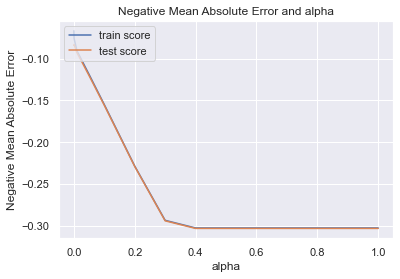

In [87]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### From the above graph we can conclude that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter

In [88]:
alpha = 0.04
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.        ,  0.00381066,  0.        ,  0.13212938,  0.00312575,
        0.        ,  0.02933378,  0.        ,  0.03802667,  0.        ,
        0.        , -0.        ,  0.10463132,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.01636124,
        0.02965926,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.05465871,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

In [89]:
# lasso model parameters

model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.999),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.004),
 ('LotArea', 0.0),
 ('OverallQual', 0.132),
 ('OverallCond', 0.003),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.029),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.038),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.105),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('Fireplaces', 0.016),
 ('GarageArea', 0.03),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('AgeOfProp', -0.055),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -0.0),
 ('LotC

In [90]:
# lasso regression

lm = Lasso(alpha=0.04)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8285415652678305
0.8452781958969388


In [91]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1487565613803544


#### The r2 value for train and test are not matched properly.So let's choose another aplha value

### I am choosing alpha = 0.01

In [92]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00698318,  0.01385863,  0.01530092,  0.11219857,  0.04956005,
        0.        ,  0.03451586,  0.        ,  0.04155321,  0.        ,
        0.        , -0.        ,  0.12480705,  0.00976136,  0.        ,
        0.        ,  0.        , -0.        , -0.00805575,  0.02372561,
        0.033997  ,  0.00962824,  0.        ,  0.        ,  0.        ,
        0.00541322,  0.        , -0.0953824 ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

In [93]:
# lasso model parameters

model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.003),
 ('MSSubClass', -0.007),
 ('LotFrontage', 0.014),
 ('LotArea', 0.015),
 ('OverallQual', 0.112),
 ('OverallCond', 0.05),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.035),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.042),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.125),
 ('BsmtFullBath', 0.01),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.008),
 ('Fireplaces', 0.024),
 ('GarageArea', 0.034),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', 0.0),
 ('AgeOfProp', -0.095),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -0.

In [94]:
# lasso regression for alpha = 0.01

lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8854624158407248
0.8894603158029369


In [95]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.12573595366706636


The R2 values for Train and Test matches well, indicating an optimum model


In [96]:
# Creating a dataframe for the coefficients obtained from Lasso

mod = list(zip(cols, model_parameters))

In [97]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.003
1,MSSubClass,-0.007
2,LotFrontage,0.014
3,LotArea,0.015
4,OverallQual,0.112


In [98]:
# sort the coefficients in ascending order

para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.003
13,GrLivArea,0.125
4,OverallQual,0.112
5,OverallCond,0.050
9,TotalBsmtSF,0.042
...,...,...
210,SaleCondition_Partial,0.000
173,KitchenQual_TA,-0.007
1,MSSubClass,-0.007
19,KitchenAbvGr,-0.008


In [99]:
# Chose variables whose coefficients are non-zero

pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.003
13,GrLivArea,0.125
4,OverallQual,0.112
5,OverallCond,0.050
9,TotalBsmtSF,0.042
7,BsmtFinSF1,0.035
21,GarageArea,0.034
20,Fireplaces,0.024
3,LotArea,0.015
2,LotFrontage,0.014


In [100]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'WoodDeckSF', 'ScreenPorch', 'KitchenQual_TA', 'MSSubClass', 'KitchenAbvGr', 'AgeOfProp']


In [101]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'WoodDeckSF', 'ScreenPorch', 'KitchenQual_TA', 'MSSubClass', 'KitchenAbvGr', 'AgeOfProp']]
X_train_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,Fireplaces,LotArea,LotFrontage,BsmtFullBath,WoodDeckSF,ScreenPorch,KitchenQual_TA,MSSubClass,KitchenAbvGr,AgeOfProp
11,1.923409,2.241710,-0.513939,0.345478,1.267298,2.231812,0.154684,0.746261,1.131973,0.485675,-0.268919,0,0.085645,-0.222797,-1.209026
1070,-0.932170,-0.764271,-0.513939,0.030191,-0.857140,-0.918240,-0.020017,0.130905,1.131973,-0.758474,3.351363,1,-0.869945,-0.222797,0.445587
513,-0.860557,-0.012775,-0.513939,0.119563,0.077613,-0.918240,-0.115156,0.083570,-0.816345,0.257158,-0.268919,1,-0.869945,-0.222797,-0.447904
467,0.401627,-0.764271,1.258264,-0.764234,-0.734395,2.231812,-0.086269,0.462250,-0.816345,0.663411,-0.268919,0,0.324542,-0.222797,0.908879
993,0.079368,-0.012775,-0.513939,-0.709617,0.455291,-0.918240,-0.148775,-0.058435,-0.816345,-0.758474,-0.268919,0,0.085645,-0.222797,-1.209026


In [102]:
X_train_lasso.shape

(1000, 15)

In [103]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'WoodDeckSF', 'ScreenPorch', 'KitchenQual_TA', 'MSSubClass', 'KitchenAbvGr', 'AgeOfProp']]
X_test_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,BsmtFinSF1,GarageArea,Fireplaces,LotArea,LotFrontage,BsmtFullBath,WoodDeckSF,ScreenPorch,KitchenQual_TA,MSSubClass,KitchenAbvGr,AgeOfProp
461,-0.813247,0.620334,3.325664,-1.205047,-0.211663,0.530538,-0.988037,-0.339155,-0.495702,1.073876,1.165362,-0.27671,0,0.282163,-0.185172,1.326790
335,0.616745,-0.825989,0.435637,1.075768,1.881258,0.299231,2.151725,17.009026,0.729276,2.969732,4.227488,-0.27671,1,3.002345,-0.185172,0.303675
200,-0.843999,-1.549150,-0.527705,0.157612,-1.026482,-0.138775,-0.988037,-0.190859,0.484280,-0.821980,0.248203,-0.27671,1,-0.851246,-0.185172,-0.924063
214,-0.248718,-0.102827,1.398980,-0.891708,-0.146477,-0.832694,-0.988037,0.068493,-0.005711,-0.821980,-0.728127,-0.27671,1,0.055482,-0.185172,-0.037363
1003,0.383905,-0.825989,0.435637,1.515413,-1.026482,0.294310,-0.988037,0.134598,0.484280,-0.821980,-0.728127,-0.27671,1,0.735527,4.779760,-0.105571


### Ridge Regression

In [104]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007677,0.003923,0.002170,0.000482,0.0001,{'alpha': 0.0001},-0.098827,-0.080586,-0.093923,-0.093385,...,-0.089726,0.007190,26,-0.063890,-0.066811,-0.062901,-0.064702,-0.065821,-0.064825,0.001380
1,0.006126,0.000610,0.002517,0.000717,0.001,{'alpha': 0.001},-0.098810,-0.080580,-0.093891,-0.093357,...,-0.089703,0.007188,25,-0.063891,-0.066811,-0.062903,-0.064704,-0.065823,-0.064826,0.001380
2,0.007277,0.001527,0.002640,0.000354,0.01,{'alpha': 0.01},-0.098639,-0.080523,-0.093591,-0.093089,...,-0.089491,0.007154,24,-0.063904,-0.066811,-0.062931,-0.064715,-0.065846,-0.064842,0.001374
3,0.006216,0.001297,0.002678,0.000715,0.05,{'alpha': 0.05},-0.097945,-0.080315,-0.092583,-0.092083,...,-0.088811,0.006922,23,-0.063979,-0.066830,-0.063098,-0.064761,-0.065935,-0.064921,0.001335
4,0.006148,0.000724,0.002334,0.000203,0.1,{'alpha': 0.1},-0.097200,-0.080133,-0.091735,-0.091160,...,-0.088212,0.006658,22,-0.064088,-0.066874,-0.063300,-0.064818,-0.066043,-0.065025,0.001292


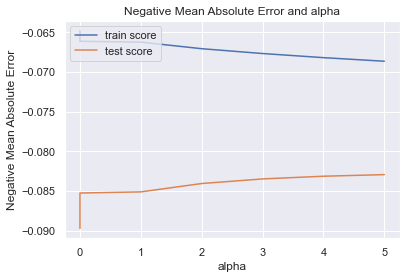

In [106]:
# plotting mean test and train scoes with alpha 

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above plot we can conclude that Negative Mean Absolute Error stabilises almost at alpha = 2


#### So i am using alpha = 2 for the analysis of ridge regression

In [107]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01661814,  0.00879344,  0.02534461,  0.06457657,  0.05124942,
       -0.00169877,  0.0304906 ,  0.00747482,  0.03650081,  0.03991915,
        0.04767425,  0.00523671,  0.07595503,  0.01170416, -0.00092158,
        0.00892371,  0.01249545,  0.0003776 , -0.00534099,  0.00350875,
        0.02078896,  0.01348507, -0.0010637 ,  0.01230575,  0.00491464,
        0.0141215 ,  0.00971184, -0.0702245 ,  0.14857807,  0.10523788,
        0.12502615,  0.09704995,  0.00219378, -0.0208621 ,  0.00027408,
        0.01235864, -0.02072982,  0.00302972,  0.01744635, -0.02148039,
       -0.05117096, -0.02397809,  0.01020923, -0.03899013, -0.0150698 ,
       -0.02340803,  0.00931668,  0.03728476, -0.00759928,  0.11394039,
       -0.05593223, -0.00971649, -0.08597375, -0.11266515, -0.04195278,
       -0.01867322,  0.04765164, -0.02093394,  0.03560318,  0.04414944,
       -0.0527455 , -0.04663915, -0.00821161,  0.00358752,  0.02349391,
        0.09259274, -0.00371216,  0.03744706,  0.01443113,  0.06

In [108]:
# ridge model parameters

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.739),
 ('MSSubClass', -0.017),
 ('LotFrontage', 0.009),
 ('LotArea', 0.025),
 ('OverallQual', 0.065),
 ('OverallCond', 0.051),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.007),
 ('TotalBsmtSF', 0.037),
 ('1stFlrSF', 0.04),
 ('2ndFlrSF', 0.048),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.076),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.009),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.005),
 ('Fireplaces', 0.004),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.01),
 ('AgeOfProp', -0.07),
 ('MSZoning_FV', 0.149),
 ('MSZoning_RH', 0.105),
 ('MSZoning_RL', 0.125),
 ('MSZoning_RM', 0.097),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', -0.021),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.012),
 ('LandContour_Low', -0.021),
 ('LandContour_Lvl', 0.003),
 ('LotConfig_CulDSac', 0.017),
 ('Lot

In [109]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9364594823911132
0.9077597079466585


In [110]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11485785595060974


#### By comparing with the lasso R2 values of train and test, Ridge regression is perform better than lasso. But, lasso brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables.

#### Because it is always better to use simple yet robust model so lasso is better model

In [111]:
# Create a dataframe for Ridge Coefficients

mod_ridge = list(zip(cols, model_parameters))

In [112]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.739
29,MSZoning_FV,0.149
31,MSZoning_RL,0.125
50,Neighborhood_Crawfor,0.114
30,MSZoning_RH,0.105
32,MSZoning_RM,0.097
210,SaleCondition_Partial,0.097
66,Neighborhood_StoneBr,0.093
13,GrLivArea,0.076
209,SaleCondition_Normal,0.074


In [113]:
# Sorting the coefficients in ascending order

paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,11.739
29,MSZoning_FV,0.149
31,MSZoning_RL,0.125
50,Neighborhood_Crawfor,0.114
30,MSZoning_RH,0.105
...,...,...
173,KitchenQual_TA,-0.080
53,Neighborhood_IDOTRR,-0.086
94,Exterior1st_BrkComm,-0.096
83,HouseStyle_2.5Fin,-0.100


### So equation can be formulated using the features and coefficients obtained by Lasso

In [114]:
#Assigning variables to coeffiecients for better understanding

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']), inplace = True) 
pred

,Variable,Coeff
C,constant,12.003
x1,GrLivArea,0.125
x2,OverallQual,0.112
x3,OverallCond,0.050
x4,TotalBsmtSF,0.042
x5,BsmtFinSF1,0.035
x6,GarageArea,0.034
x7,Fireplaces,0.024
x8,LotArea,0.015
x9,LotFrontage,0.014


#### The equation formed by the above variables is: Log(Y) = C + 0.125(x1) + 0.112(x2) + 0.050(x3) + 0.042(x4) + 0.035(x5) + 0.034(x6) + 0.024(x7) + 0.015(x8) + 0.014(x9) + 0.010(x10) + 0.010(x11) + 0.005(x12) - 0.007(x13) - 0.007(x14) - 0.008(x15) - 0.095(x16) 

### Inference from the house data set is: 

#### The higher values of positive coeeficients suggest a high sale value.



#### The higher values of negative coeeficients suggest a decrease in sale value.
